In [6]:
!pip install findspark

In [1]:
import findspark
findspark.init()

from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()
data = [
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1)
]
columns = ['Name', 'Age', 'Gender', 'Salary', 'DeptId']
df = spark.createDataFrame(data, schema=columns)
df.createOrReplaceTempView('employees')
spark.sql('SELECT * FROM employees').show()
spark.sql('SELECT Name, Age FROM employees WHERE Salary > 3000').show()
spark.sql('SELECT AVG(Salary) FROM employees').show()

25/10/27 07:30:55 WARN Utils: Your hostname, ahmadyaa-VirtualBox resolves to a loopback address: 127.0.1.1; using 10.0.2.15 instead (on interface enp0s3)
25/10/27 07:30:55 WARN Utils: Set SPARK_LOCAL_IP if you need to bind to another address
Setting default log level to "WARN".
To adjust logging level use sc.setLogLevel(newLevel). For SparkR, use setLogLevel(newLevel).
25/10/27 07:31:07 WARN NativeCodeLoader: Unable to load native-hadoop library for your platform... using builtin-java classes where applicable
25/10/27 07:31:09 WARN Utils: Service 'SparkUI' could not bind on port 4040. Attempting port 4041.
25/10/27 07:31:23 WARN GarbageCollectionMetrics: To enable non-built-in garbage collector(s) List(G1 Concurrent GC), users should configure it(them) to spark.eventLog.gcMetrics.youngGenerationGarbageCollectors or spark.eventLog.gcMetrics.oldGenerationGarbageCollectors
                                                                                

+-----+---+------+------+------+
| Name|Age|Gender|Salary|DeptId|
+-----+---+------+------+------+
|James| 34|     M|  3000|     1|
| Anna| 28|     F|  4100|     2|
|  Lee| 23|     M|  2700|     1|
+-----+---+------+------+------+

+----+---+
|Name|Age|
+----+---+
|Anna| 28|
+----+---+



[Stage 6:============================================>              (6 + 2) / 8]

+------------------+
|       avg(Salary)|
+------------------+
|3266.6666666666665|
+------------------+



In [2]:
spark.sql('''
SELECT Gender, SUM(Salary) as TotalSalary, Age
FROM employees
GROUP BY Gender, Age
ORDER BY Age
''').show()

[Stage 9:>                                                          (0 + 8) / 8]

+------+-----------+---+
|Gender|TotalSalary|Age|
+------+-----------+---+
|     M|       2700| 23|
|     F|       4100| 28|
|     M|       3000| 34|
+------+-----------+---+



In [8]:
spark.sql('''
SELECT AVG(Salary) as AverageSalary, DeptId
FROM employees
GROUP BY Gender, DeptId
ORDER BY DeptId
''').show()

[Stage 18:>                                                         (0 + 8) / 8]

+-------------+------+
|AverageSalary|DeptId|
+-------------+------+
|       2850.0|     1|
|       4100.0|     2|
+-------------+------+



In [10]:
spark.sql('''
SELECT Name, Salary 
FROM employees 
WHERE Salary > 2850
GROUP BY Name, Salary
''').show()

[Stage 21:>                                                         (0 + 8) / 8]

+-----+------+
| Name|Salary|
+-----+------+
|James|  3000|
| Anna|  4100|
+-----+------+



In [13]:
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

[Stage 24:>                                                         (0 + 8) / 8]

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
+-----+------+------+----+



In [14]:
spark.sql('''
SELECT Name, Age, Salary, ROW_NUMBER() OVER (PARTITION BY Age ORDER BY Salary DESC) as rank
FROM employees
''').show()

[Stage 27:====================================>                     (5 + 3) / 8]

+-----+---+------+----+
| Name|Age|Salary|rank|
+-----+---+------+----+
|  Lee| 23|  2700|   1|
| Anna| 28|  4100|   1|
|James| 34|  3000|   1|
+-----+---+------+----+



In [24]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName('Pertemuan9').getOrCreate()

# Data setup for complex SQL queries
employees = spark.createDataFrame([
    ('James', 34, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 23, 'M', 2700, 1),
    ('Mada', 21, 'M', 4000, 2)
], ['Name', 'Age', 'Gender', 'Salary', 'DeptId'])
departments = spark.createDataFrame([
    (1, 'HR'),
    (2, 'Marketing')
], ['DeptId', 'DeptName'])
projects = spark.createDataFrame([
    (1, 'Project A'),
    (2, 'Project B')
], ['DeptId', 'ProjectName'])
employees.createOrReplaceTempView('employees')
departments.createOrReplaceTempView('departments')
projects.createOrReplaceTempView('projects')

# Complex SQL query involving multiple joins and subqueries
spark.sql('''
SELECT e.Name, e.Age, d.DeptName, p.ProjectName
FROM employees e
JOIN departments d ON e.DeptId = d.DeptId
JOIN projects p ON e.DeptId = p.DeptId
''').show()


+-----+---+---------+-----------+
| Name|Age| DeptName|ProjectName|
+-----+---+---------+-----------+
|  Lee| 23|       HR|  Project A|
|James| 34|       HR|  Project A|
| Mada| 21|Marketing|  Project B|
| Anna| 28|Marketing|  Project B|
+-----+---+---------+-----------+



In [29]:
spark.sql('''
SELECT d.DeptName, AVG(e.Salary) AS RataRataGaji
FROM employees e
JOIN departments d
ON e.DeptId = d.DeptId
Group BY d.DeptName
ORDER BY RataRataGaji DESC
''').show()
spark.sql('''
SELECT Name, DeptId,Salary,
RANK() OVER (PARTITION BY DeptId ORDER BY Salary DESC) AS Rank
FROM employees
''').show()

+---------+------------+
| DeptName|RataRataGaji|
+---------+------------+
|Marketing|      4050.0|
|       HR|      2850.0|
+---------+------------+

+-----+------+------+----+
| Name|DeptId|Salary|Rank|
+-----+------+------+----+
|James|     1|  3000|   1|
|  Lee|     1|  2700|   2|
| Anna|     2|  4100|   1|
| Mada|     2|  4000|   2|
+-----+------+------+----+



In [30]:
!pip install matplotlib


   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 8.7/8.7 MB 4.7 MB/s  0:00:01 eta 0:00:010:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.9/4.9 MB 6.0 MB/s  0:00:006.6 MB/s eta 0:00:01:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.5/1.5 MB 6.2 MB/s  0:00:00m 7.3 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7.0/7.0 MB 4.0 MB/s  0:00:01m 4.6 MB/s eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib] 6/7 [matplotlib]ourpy]


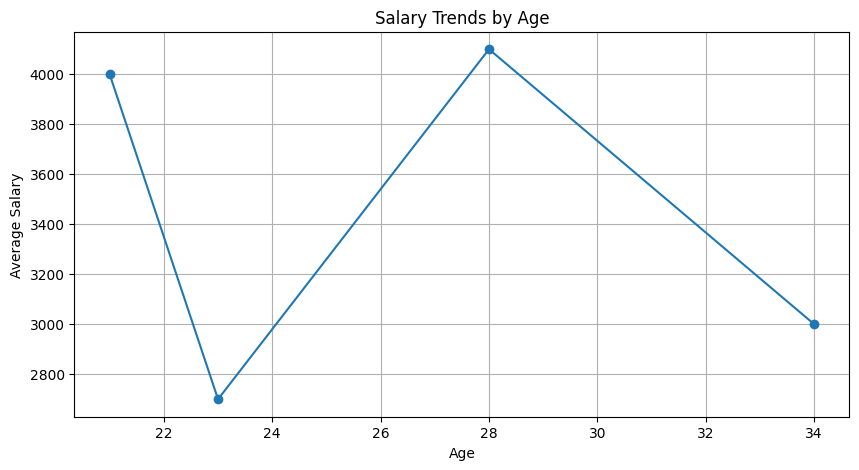

In [31]:
import matplotlib.pyplot as plt
import pandas as pd

# Advanced data analysis with visualization
salary_trends = spark.sql('''
SELECT Age, AVG(Salary) AS AverageSalary
FROM employees
GROUP BY Age
ORDER BY Age
''').toPandas()

# Visualization of salary trends
plt.figure(figsize=(10, 5))
plt.plot(salary_trends['Age'], salary_trends['AverageSalary'], marker='o')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Salary Trends by Age')
plt.grid(True)
plt.show()


In [33]:
result = spark.sql('''
SELECT d.DeptName,
       SUM(e.Salary) AS TotalSalary,
       COUNT(e.Name) AS EmployeeCount
FROM employees e
JOIN departments d
  ON e.DeptId = d.DeptId
GROUP BY d.DeptName
''')

result.show()

[Stage 97:>                                                         (0 + 8) / 8]

+---------+-----------+-------------+
| DeptName|TotalSalary|EmployeeCount|
+---------+-----------+-------------+
|       HR|       5700|            2|
|Marketing|       8100|            2|
+---------+-----------+-------------+



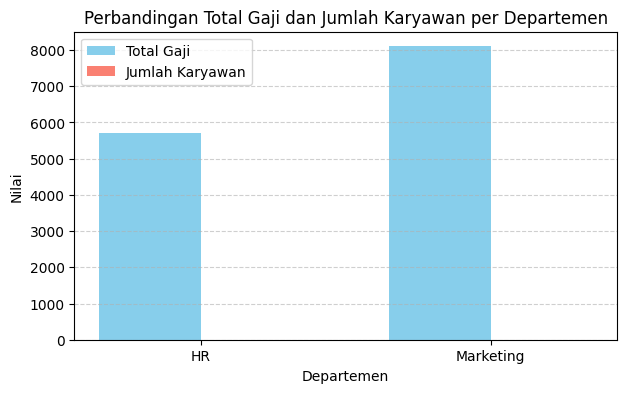

In [34]:
import matplotlib.pyplot as plt

# Konversi ke Pandas
pdf = result.toPandas()

# Buat figure
plt.figure(figsize=(7,4))

# Plot dua batang berdampingan
bar_width = 0.35
x = range(len(pdf))

plt.bar([i - bar_width/2 for i in x], pdf['TotalSalary'], 
        width=bar_width, label='Total Gaji', color='skyblue')
plt.bar([i + bar_width/2 for i in x], pdf['EmployeeCount'], 
        width=bar_width, label='Jumlah Karyawan', color='salmon')

plt.xticks(x, pdf['DeptName'])
plt.title('Perbandingan Total Gaji dan Jumlah Karyawan per Departemen')
plt.xlabel('Departemen')
plt.ylabel('Nilai')
plt.legend()
plt.grid(axis='y', linestyle='--', alpha=0.6)
plt.show()

25/10/27 07:35:16 WARN SparkSession: Using an existing Spark session; only runtime SQL configurations will take effect.
                                                                                

Employees with Salary Above Average:
      Name  Age  Salary    AvgSalary
0    James   20    3000  2966.666667
1     John   22    3200  3033.333333
2    David   28    4500  4400.000000
3  Michael   30    5000  4900.000000
4     Lily   20    3200  2966.666667
5      Zoe   25    3800  3650.000000
6    Mason   28    4600  4400.000000


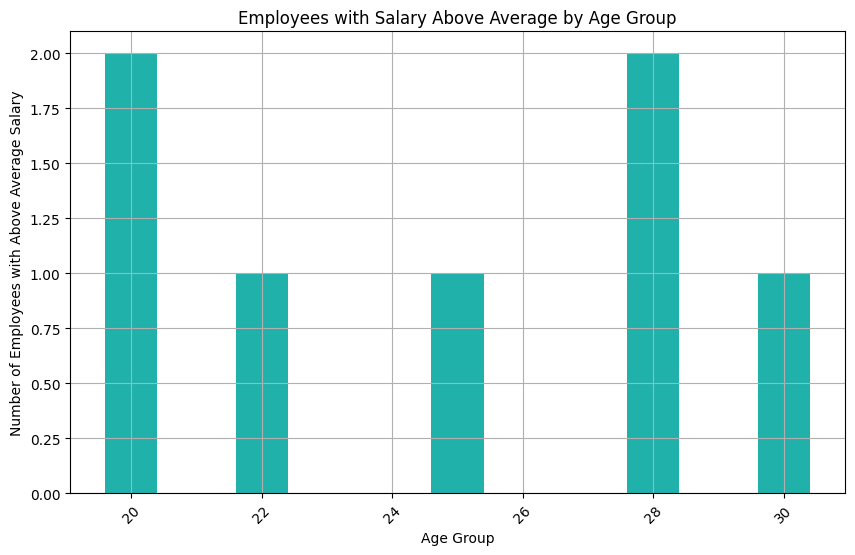

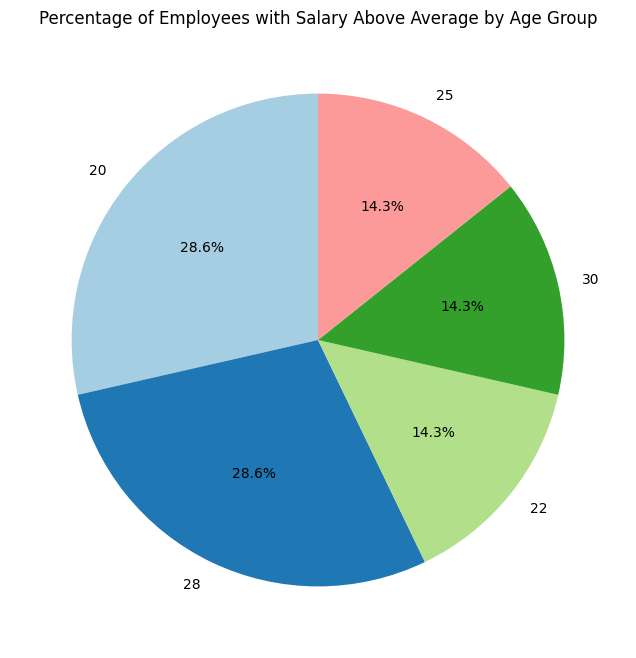

In [3]:
import matplotlib.pyplot as plt
import pandas as pd
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.master("local").appName("Salary Analysis").getOrCreate()

# Data yang lebih besar (20 data)
data = [
    ('James', 20, 'M', 3000, 1),
    ('Anna', 28, 'F', 4100, 2),
    ('Lee', 20, 'M', 2700, 1),
    ('John', 22, 'M', 3200, 2),
    ('Sarah', 25, 'F', 3500, 1),
    ('David', 28, 'M', 4500, 3),
    ('Sophia', 30, 'F', 4800, 3),
    ('Lucas', 24, 'M', 2800, 2),
    ('Emily', 26, 'F', 4100, 2),
    ('Michael', 30, 'M', 5000, 1),
    ('Ethan', 22, 'M', 3000, 2),
    ('Lily', 20, 'F', 3200, 1),
    ('Zoe', 25, 'F', 3800, 3),
    ('Mason', 28, 'M', 4600, 1),
    ('Isabella', 22, 'F', 2900, 2),
    ('Aiden', 23, 'M', 3300, 1),
    ('Harper', 29, 'F', 4200, 2),
    ('William', 21, 'M', 3100, 3),
    ('Ella', 30, 'F', 4900, 1)
]

# Kolom untuk DataFrame
columns = ['Name', 'Age', 'Gender', 'Salary', 'Department']

# Membuat DataFrame Spark
df = spark.createDataFrame(data, columns)

# Daftarkan DataFrame sebagai temporary view agar bisa dijalankan query SQL
df.createOrReplaceTempView("employees")

# Query untuk menghitung rata-rata gaji per kelompok usia
avg_salary_by_age = spark.sql('''
SELECT Age, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Age
''')

# Gabungkan hasil rata-rata gaji per usia dengan data karyawan untuk mendapatkan karyawan dengan gaji di atas rata-rata
result_above_avg = spark.sql('''
SELECT e.Name, e.Age, e.Salary, avg_salary.AvgSalary
FROM employees e
JOIN (SELECT Age, AVG(Salary) AS AvgSalary
      FROM employees
      GROUP BY Age) avg_salary
ON e.Age = avg_salary.Age
WHERE e.Salary > avg_salary.AvgSalary
''').toPandas()

# Menampilkan hasil yang telah disaring
print("Employees with Salary Above Average:")
print(result_above_avg)

# Visualisasi: Distribusi karyawan yang memiliki gaji di atas rata-rata per kelompok usia

# Membuat grafik batang untuk distribusi usia karyawan dengan gaji di atas rata-rata
plt.figure(figsize=(10, 6))
age_groups = result_above_avg['Age'].value_counts()

# Membuat bar chart
plt.bar(age_groups.index, age_groups.values, color='lightseagreen')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees with Above Average Salary')
plt.title('Employees with Salary Above Average by Age Group')
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

# Jika ingin membuat Pie Chart (Disarankan jika kelompok usia lebih sedikit)
plt.figure(figsize=(8, 8))
plt.pie(age_groups, labels=age_groups.index, autopct='%1.1f%%', startangle=90, colors=plt.cm.Paired.colors)
plt.title('Percentage of Employees with Salary Above Average by Age Group')
plt.show()

Total Salary and Employee Count per Department:
   Department  TotalSalary  EmployeeCount
0           1       154710             40
1           2        98319             27
2           3       123430             33

Average Salary per Age Group:
    Age    AvgSalary
0    20  3610.000000
1    21  3884.000000
2    22  3769.500000
3    23  3839.166667
4    24  3059.000000
5    25  2958.000000
6    26  3332.750000
7    27  3933.833333
8    28  3362.600000
9    29  4265.500000
10   30  3907.000000
11   31  3770.000000
12   32  3656.333333
13   33  3554.000000
14   34  3779.000000
15   36  4823.000000
16   37  3382.400000
17   38  4002.666667
18   39  4377.666667
19   40  3290.000000
20   41  4157.000000
21   42  3919.000000
22   43  4440.250000
23   44  3571.000000
24   45  3540.333333
25   46  4686.500000
26   47  4147.600000
27   48  3167.000000
28   49  4280.000000
29   50  3155.000000

Average Salary per Department:
   Department    AvgSalary
0           1  3867.750000
1           2  3

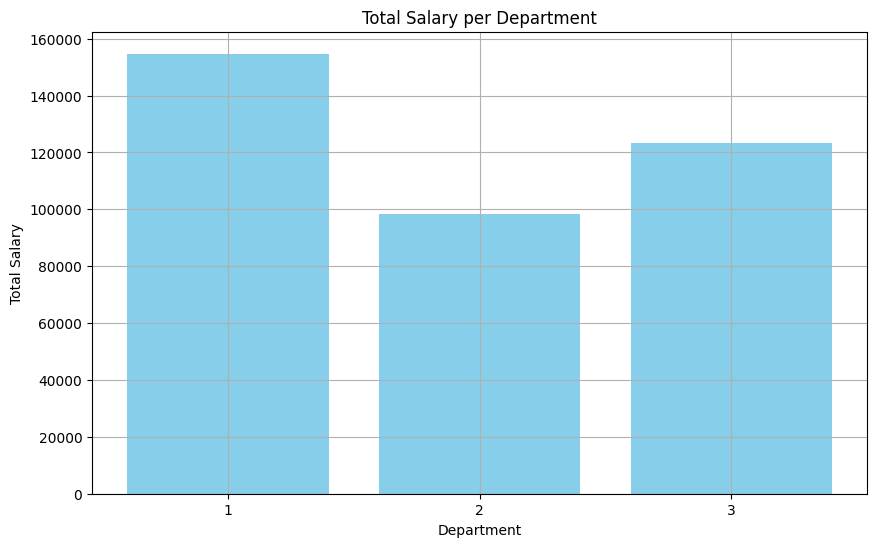

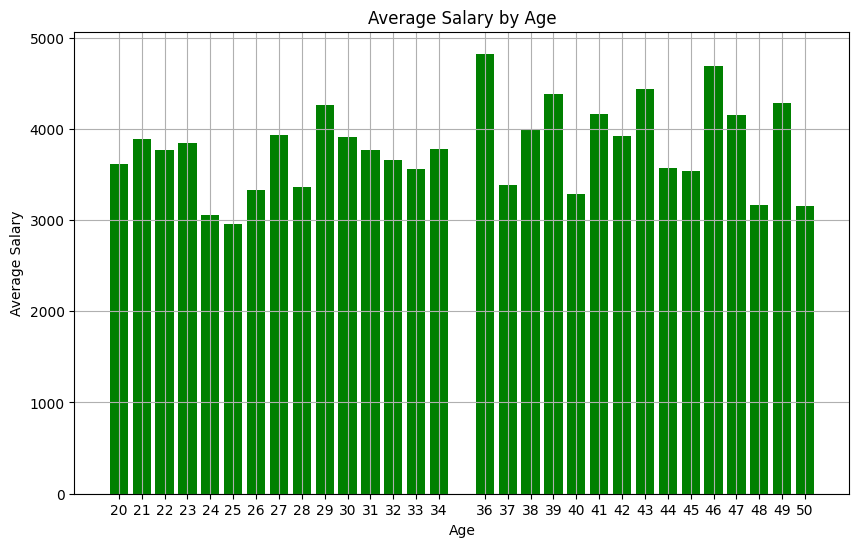

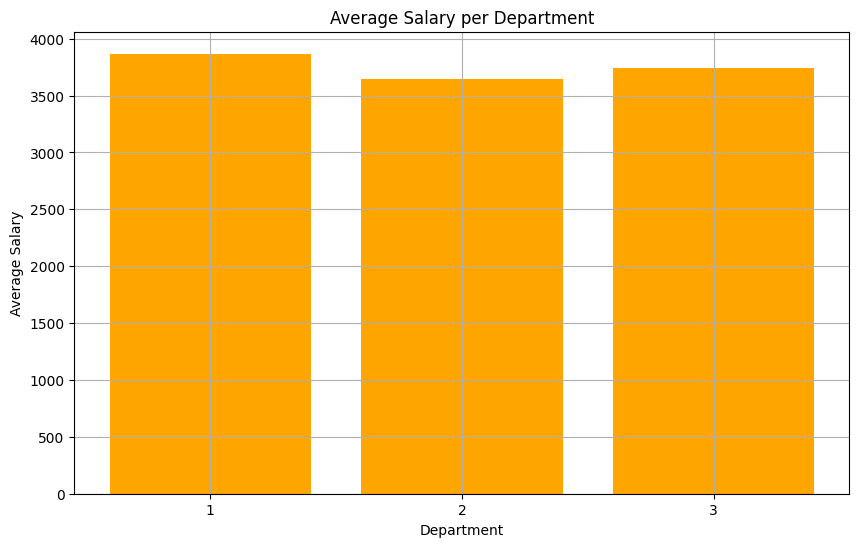

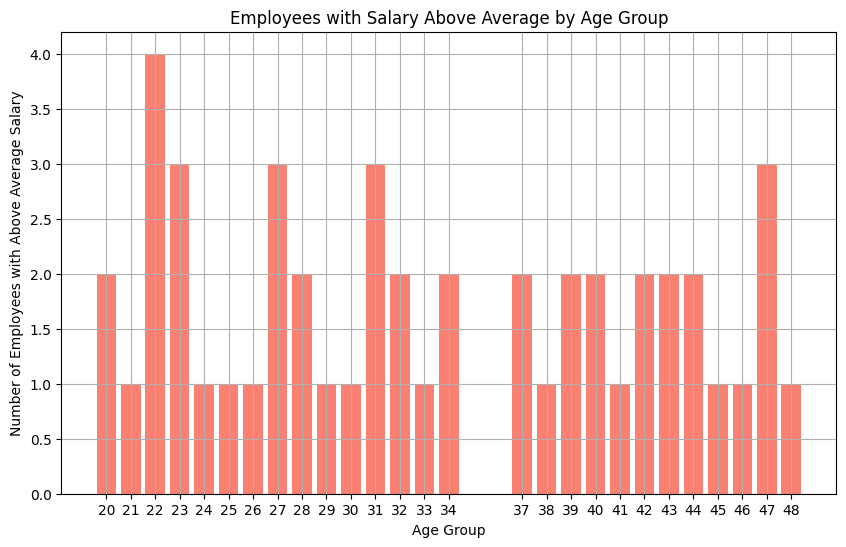

In [4]:
import random
import pandas as pd
import matplotlib.pyplot as plt
from pyspark.sql import SparkSession

# Membuat Spark session
spark = SparkSession.builder.master("local").appName("Salary Analysis").getOrCreate()

# Membuat 100 data karyawan secara acak
random.seed(42)
names = ['James', 'Anna', 'Lee', 'John', 'Sarah', 'David', 'Sophia', 'Lucas', 'Emily', 'Michael',
         'Ethan', 'Lily', 'Zoe', 'Mason', 'Isabella', 'Aiden', 'Harper', 'William', 'Ella', 'Liam']
departments = [1, 2, 3]
ages = [random.randint(20, 50) for _ in range(100)]
genders = ['M', 'F']
salaries = [random.randint(2500, 5000) for _ in range(100)]
departments_col = [random.choice(departments) for _ in range(100)]
names_col = [random.choice(names) for _ in range(100)]
genders_col = [random.choice(genders) for _ in range(100)]

# Membuat data karyawan
data = list(zip(names_col, ages, genders_col, salaries, departments_col))

# Kolom untuk DataFrame
columns = ['Name', 'Age', 'Gender', 'Salary', 'Department']

# Membuat DataFrame Spark
df = spark.createDataFrame(data, columns)

# Daftarkan DataFrame sebagai temporary view agar bisa dijalankan query SQL
df.createOrReplaceTempView("employees")

# Analisis 1: Total gaji dan jumlah karyawan per departemen
total_salary_and_count_per_dept = spark.sql('''
SELECT Department, SUM(Salary) AS TotalSalary, COUNT(*) AS EmployeeCount
FROM employees
GROUP BY Department
ORDER BY Department
''')

# Analisis 2: Rata-rata gaji per kelompok usia
avg_salary_by_age = spark.sql('''
SELECT Age, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Age
ORDER BY Age
''')

# Analisis 3: Rata-rata gaji per departemen
avg_salary_per_dept = spark.sql('''
SELECT Department, AVG(Salary) AS AvgSalary
FROM employees
GROUP BY Department
ORDER BY Department
''')

# Analisis 4: Karyawan dengan gaji di atas rata-rata per kelompok usia
result_above_avg_by_age = spark.sql('''
SELECT e.Name, e.Age, e.Salary, avg_salary.AvgSalary
FROM employees e
JOIN (SELECT Age, AVG(Salary) AS AvgSalary
      FROM employees
      GROUP BY Age) avg_salary
ON e.Age = avg_salary.Age
WHERE e.Salary > avg_salary.AvgSalary
''')

# Convert ke Pandas untuk visualisasi
total_salary_and_count_per_dept_df = total_salary_and_count_per_dept.toPandas()
avg_salary_by_age_df = avg_salary_by_age.toPandas()
avg_salary_per_dept_df = avg_salary_per_dept.toPandas()
result_above_avg_by_age_df = result_above_avg_by_age.toPandas()

# Menampilkan hasil analisis
print("Total Salary and Employee Count per Department:")
print(total_salary_and_count_per_dept_df)

print("\nAverage Salary per Age Group:")
print(avg_salary_by_age_df)

print("\nAverage Salary per Department:")
print(avg_salary_per_dept_df)

print("\nEmployees with Salary Above Average by Age:")
print(result_above_avg_by_age_df)

# Visualisasi: Total Salary and Employee Count per Department
plt.figure(figsize=(10, 6))
plt.bar(total_salary_and_count_per_dept_df['Department'], total_salary_and_count_per_dept_df['TotalSalary'], 
        color='skyblue', label='Total Salary')
plt.xlabel('Department')
plt.ylabel('Total Salary')
plt.title('Total Salary per Department')
plt.xticks(total_salary_and_count_per_dept_df['Department'])
plt.grid(True)
plt.show()

# Visualisasi: Average Salary per Age Group
plt.figure(figsize=(10, 6))
plt.bar(avg_salary_by_age_df['Age'], avg_salary_by_age_df['AvgSalary'], color='green')
plt.xlabel('Age')
plt.ylabel('Average Salary')
plt.title('Average Salary by Age')
plt.xticks(avg_salary_by_age_df['Age'])
plt.grid(True)
plt.show()

# Visualisasi: Average Salary per Department
plt.figure(figsize=(10, 6))
plt.bar(avg_salary_per_dept_df['Department'], avg_salary_per_dept_df['AvgSalary'], color='orange')
plt.xlabel('Department')
plt.ylabel('Average Salary')
plt.title('Average Salary per Department')
plt.xticks(avg_salary_per_dept_df['Department'])
plt.grid(True)
plt.show()

# Visualisasi: Employees with Salary Above Average per Age
plt.figure(figsize=(10, 6))
age_groups_above_avg = result_above_avg_by_age_df['Age'].value_counts()
plt.bar(age_groups_above_avg.index, age_groups_above_avg.values, color='salmon')
plt.xlabel('Age Group')
plt.ylabel('Number of Employees with Above Average Salary')
plt.title('Employees with Salary Above Average by Age Group')
plt.xticks(age_groups_above_avg.index)
plt.grid(True)
plt.show()